In [323]:
import torch
import torch.nn as nn
import torch.optim as optim
from matplotlib import pyplot as plt
import numpy as np
from sklearn.datasets import make_circles, make_blobs
from sklearn.model_selection import train_test_split

In [213]:
X, Y = make_circles(n_samples=1000, noise=0.03, random_state=42)
X[:10], Y[:10]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343],
        [-0.47964637,  0.67643477],
        [-0.01364836,  0.80334872],
        [ 0.77151327,  0.14775959],
        [-0.16932234, -0.79345575],
        [-0.1214858 ,  1.02150905]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [214]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train = torch.from_numpy(X_train).type(torch.FloatTensor)
X_test = torch.from_numpy(X_test).type(torch.FloatTensor)
Y_train = torch.from_numpy(Y_train).type(torch.FloatTensor)
Y_test = torch.from_numpy(Y_test).type(torch.FloatTensor)

In [215]:
# Build model with non-linear activation function
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU() # <- add in ReLU activation function
        # Can also put sigmoid in the model 
        # This would mean you don't need to use it on the predictions
        # self.sigmoid = nn.Sigmoid()

    def forward(self, x):
      # Intersperse the ReLU activation function between layers
       return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
print(model_3)

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [216]:
# Setup loss and optimizer 
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.001)

In [217]:
# Fit the model
torch.manual_seed(42)
epochs = 1000

# Put all data on target device
X_train, Y_train = X_train.to(device), Y_train.to(device)
X_test, Y_test = X_test.to(device), Y_test.to(device)

for epoch in range(epochs):
    # 1. Forward pass
    Y_logits = model_3(X_train).squeeze()
    Y_pred = torch.round(torch.sigmoid(Y_logits)) # logits -> prediction probabilities -> prediction labels
    
    # 2. Calculate loss and accuracy
    loss = loss_fn(Y_logits, Y_train) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(Y_true=Y_train, 
                      Y_pred=Y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_3.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_3(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calculate loss and accuracy
      test_loss = loss_fn(test_logits, Y_test)
      test_acc = accuracy_fn(Y_true=Y_test,
                             Y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc * 100:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc * 100:.2f}%")

Epoch: 0 | Loss: 0.69295, Accuracy: 50.00% | Test Loss: 0.69325, Test Accuracy: 50.00%
Epoch: 100 | Loss: 0.69289, Accuracy: 50.00% | Test Loss: 0.69319, Test Accuracy: 50.00%
Epoch: 200 | Loss: 0.69284, Accuracy: 50.00% | Test Loss: 0.69312, Test Accuracy: 50.00%
Epoch: 300 | Loss: 0.69279, Accuracy: 50.00% | Test Loss: 0.69305, Test Accuracy: 50.00%
Epoch: 400 | Loss: 0.69273, Accuracy: 50.00% | Test Loss: 0.69299, Test Accuracy: 50.00%
Epoch: 500 | Loss: 0.69268, Accuracy: 50.00% | Test Loss: 0.69292, Test Accuracy: 50.00%
Epoch: 600 | Loss: 0.69264, Accuracy: 50.00% | Test Loss: 0.69286, Test Accuracy: 50.00%
Epoch: 700 | Loss: 0.69259, Accuracy: 50.00% | Test Loss: 0.69280, Test Accuracy: 50.00%
Epoch: 800 | Loss: 0.69255, Accuracy: 50.00% | Test Loss: 0.69275, Test Accuracy: 50.00%
Epoch: 900 | Loss: 0.69251, Accuracy: 50.38% | Test Loss: 0.69270, Test Accuracy: 50.00%


In [218]:
def plot_data(X, Y, predictions=None, X_test=None):
    plt.figure(figsize=(10, 7))
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.RdYlBu, s=100)

    if predictions is not None:
        for i in range(len(X)):
            plt.text(X[i, 0], X[i, 1], str(int(predictions[i].item())), 
                     color="black", fontsize=12, ha='center', va='center')

    if X_test is not None:
        plt.scatter(X_test[:, 0], X_test[:, 1], facecolors='none', edgecolors='k', s=200, label='Test Data')
        plt.legend()

    plt.title("Data Visualization with Predictions")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

Final Test Loss:  0.6918 | Final Test Accuracy:  50.00%


IndexError: index 200 is out of bounds for dimension 0 with size 200

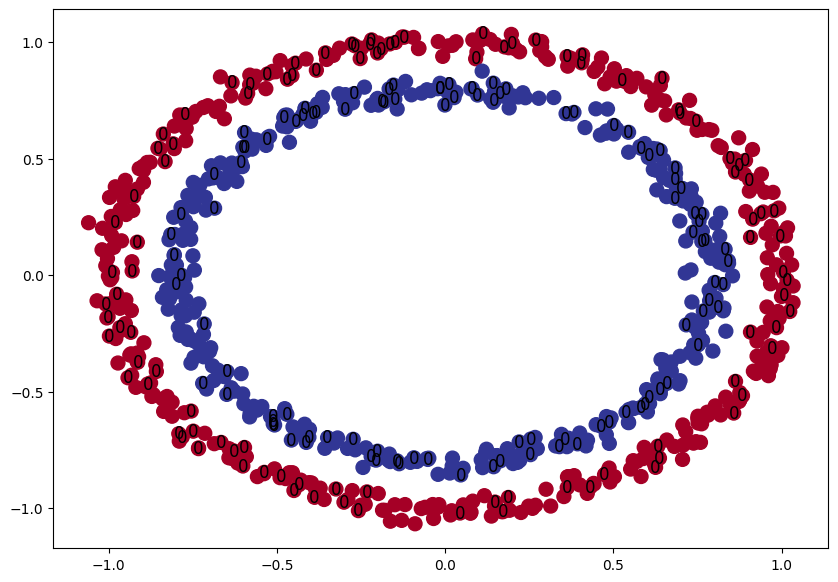

In [ ]:
with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_preds = torch.round(test_logits)
    test_loss = loss_fnV0(test_logits, Y_test)
    test_acc = accuracy_fn(Y_test, test_preds)
    print(f"Final Test Loss: {test_loss: .4f} | Final Test Accuracy: {test_acc * 100: .2f}%")


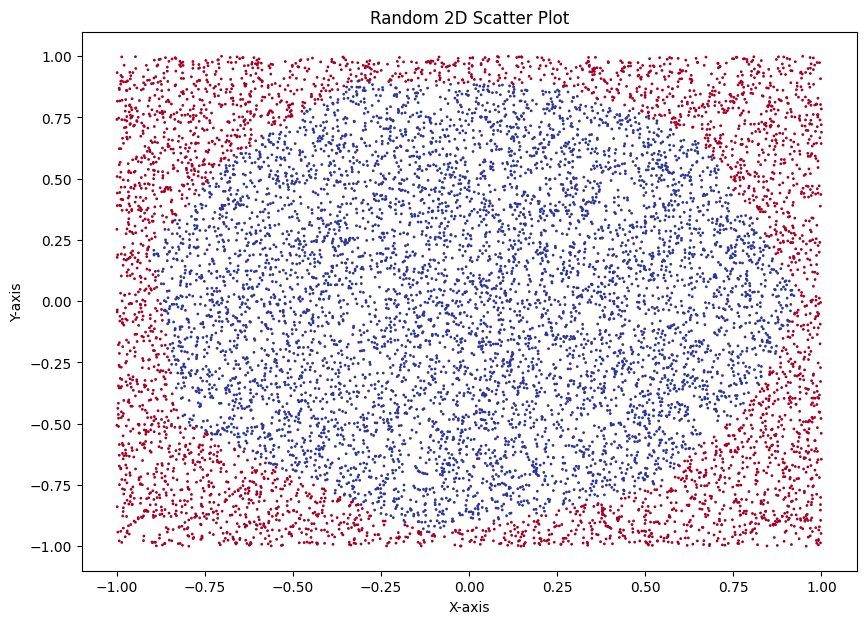

In [ ]:

scatter2d_data = torch.rand(10000, 2) * 2 - 1  # Random points in range [-1, 1]
with torch.inference_mode():
    pred_logits = model_3(scatter2d_data.to(device)).squeeze()
    pred_data = torch.round(torch.sigmoid(pred_logits)).cpu()
    


plt.figure(figsize=(10, 7))
plt.scatter(scatter2d_data[:, 0], scatter2d_data[:, 1], c=pred_data.cpu(), s=1, cmap=plt.cm.RdYlBu)
plt.title("Random 2D Scatter Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

In [ ]:
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42


X_blob, Y_blob = make_blobs(n_samples=1000, centers=NUM_CLASSES, cluster_std=1.5, random_state=RANDOM_SEED)

X_blob[:10], Y_blob[:10]

(array([[-8.41339595,  6.93516545],
        [-5.76648413, -6.43117072],
        [-6.04213682, -6.76610151],
        [ 3.95083749,  0.69840313],
        [ 4.25049181, -0.28154475],
        [-6.7941075 , -6.47722117],
        [ 5.21017561,  2.8890483 ],
        [-5.50513568, -6.36037688],
        [-6.54375599, -4.83389895],
        [ 6.44964229,  0.74776618]]),
 array([3, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 3, 0, 2, 2, 2, 0, 0, 0, 1, 1, 3,
        3, 3, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 0, 3, 2, 1, 3, 3, 1, 2, 1, 3,
        1, 3, 0, 1, 3, 1, 2, 0, 1, 3, 0, 3, 0, 0, 0, 2, 2, 0, 2, 3, 1, 0,
        2, 2, 1, 0, 3, 0, 1, 2, 1, 3, 1, 0, 1, 0, 2, 0, 0, 0, 1, 3, 2, 2,
        0, 0, 0, 0, 1, 1, 3, 1, 3, 0, 1, 2]))

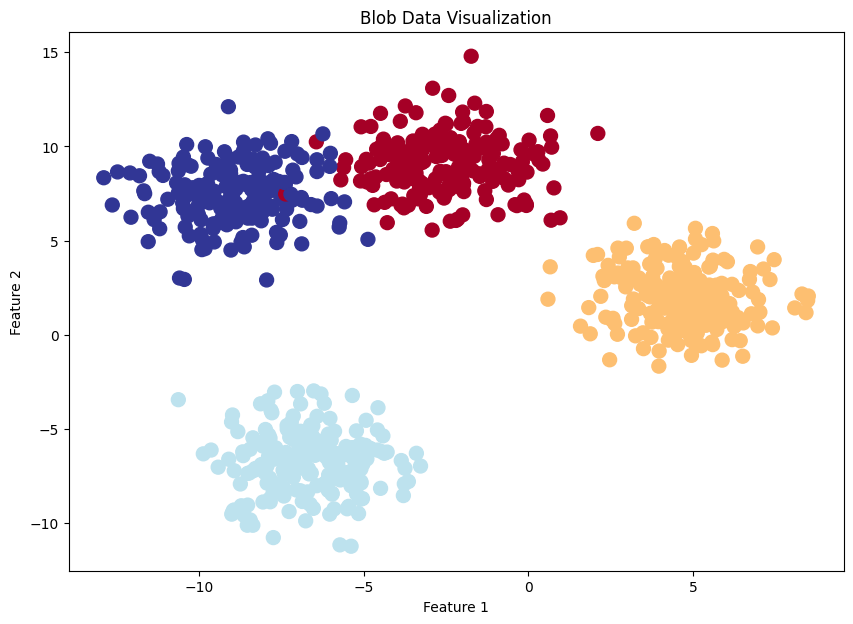

In [230]:
X_blob = X_blob.to(device)
Y_blob = Y_blob.to(device)

X_blob_train, X_blob_test, Y_blob_train, Y_blob_test = train_test_split(X_blob, Y_blob, test_size=0.2, random_state=RANDOM_SEED)

plt.figure(figsize=(10, 7))
plt.scatter(X_blob_train[:, 0].cpu(), X_blob_train[:, 1].cpu(), c=Y_blob_train.cpu(), cmap=plt.cm.RdYlBu, s=100)
plt.title("Blob Data Visualization")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [231]:
class BlobModelV0(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features)
        )

    def forward(self, x):
        return self.linear_layer_stack(x)


model_4 = BlobModelV0(input_features=NUM_FEATURES, output_features=NUM_CLASSES, hidden_units=8).to(device)
print(model_4)

BlobModelV0(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)


In [232]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_4.parameters(), lr=0.0001)

In [237]:
model_4(X_blob_test[:5])

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

In [238]:
y_logits = model_4(X_blob_train)

# Softmax
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.7586, -0.6810, -1.5180, -1.1178],
        [-0.2398, -1.2335, -0.9858, -0.2899],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [ 0.2391, -0.2472,  0.1494,  0.0213],
        [-0.1214, -0.9804, -0.6918, -0.1923]], device='cuda:0',
       grad_fn=<SliceBackward0>)
tensor([[0.3080, 0.3328, 0.1441, 0.2150],
        [0.3577, 0.1324, 0.1696, 0.3402],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3000, 0.1845, 0.2743, 0.2413],
        [0.3424, 0.1450, 0.1936, 0.3190]], device='cuda:0',
       grad_fn=<SliceBackward0>)


In [241]:
def train_blob_model(model, X_train, Y_train, X_test, Y_test, loss_fn, optimizer, epochs=1000):
    for epoch in range(epochs):
        model.train()
        # 1. Forward pass
        y_logits = model(X_train)
        y_pred_probs = torch.softmax(y_logits, dim=1)
        y_pred = torch.argmax(y_logits)

        # 2. Calculate loss and accuracy
        loss = loss_fn(y_logits, Y_train)
        acc = accuracy_fn(Y_true=Y_train,
                          Y_pred=y_pred)

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        ### Testing
        model.eval()
        with torch.inference_mode():
            # 1. Forward pass
            y_logits = model(X_test)
            y_pred = torch.argmax(y_logits, dim=1)

            # 2. Calculate loss and accuracy
            loss = loss_fn(y_logits, Y_test)
            acc = accuracy_fn(Y_true=Y_test,
                              Y_pred=y_pred)

            # 3. Print metrics
            if epoch % 100 == 0:
                print(f"Epoch: {epoch} | Train Loss: {loss.item():.4f} | Train Acc: {acc * 100:.2f}%")


In [254]:
# train the model
train_blob_model(model_4,
                 X_blob_train,
                 Y_blob_train,
                 X_blob_test,
                 Y_blob_test,
                 loss_fn,
                 optimizer,
                 epochs=10000)

Epoch: 0 | Train Loss: 0.5693 | Train Acc: 99.50%
Epoch: 100 | Train Loss: 0.5669 | Train Acc: 99.50%
Epoch: 200 | Train Loss: 0.5645 | Train Acc: 99.50%
Epoch: 300 | Train Loss: 0.5620 | Train Acc: 99.50%
Epoch: 400 | Train Loss: 0.5596 | Train Acc: 99.50%
Epoch: 500 | Train Loss: 0.5572 | Train Acc: 99.50%
Epoch: 600 | Train Loss: 0.5548 | Train Acc: 99.50%
Epoch: 700 | Train Loss: 0.5524 | Train Acc: 99.50%
Epoch: 800 | Train Loss: 0.5499 | Train Acc: 99.50%
Epoch: 900 | Train Loss: 0.5475 | Train Acc: 99.50%
Epoch: 1000 | Train Loss: 0.5451 | Train Acc: 99.50%
Epoch: 1100 | Train Loss: 0.5427 | Train Acc: 99.50%
Epoch: 1200 | Train Loss: 0.5404 | Train Acc: 99.50%
Epoch: 1300 | Train Loss: 0.5380 | Train Acc: 99.50%
Epoch: 1400 | Train Loss: 0.5356 | Train Acc: 99.50%
Epoch: 1500 | Train Loss: 0.5332 | Train Acc: 99.50%
Epoch: 1600 | Train Loss: 0.5308 | Train Acc: 99.50%
Epoch: 1700 | Train Loss: 0.5284 | Train Acc: 99.50%
Epoch: 1800 | Train Loss: 0.5261 | Train Acc: 99.50%
Epoch

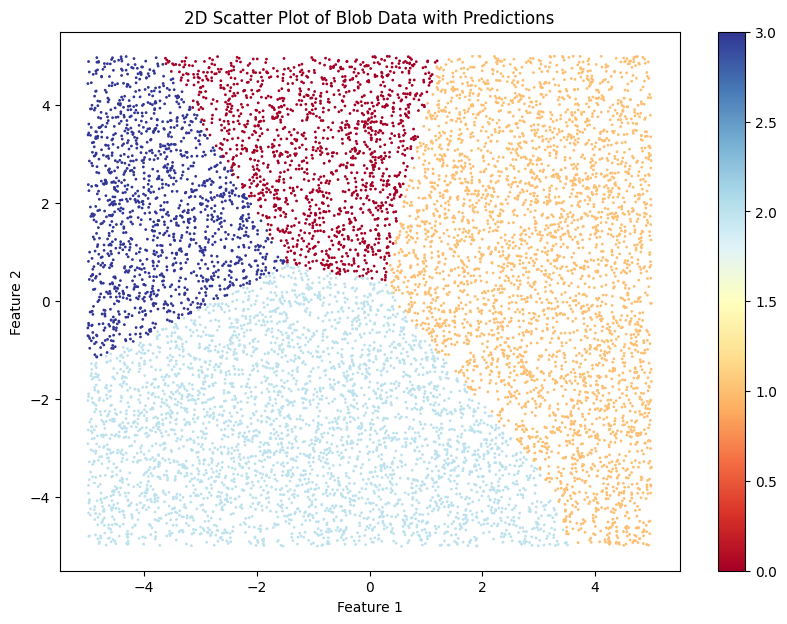

In [264]:
scatter2d_blob_data = torch.rand(10000, 2) * 10 - 5  # Random points in range [-5, 5]
with torch.inference_mode():
    pred_logits = model_4(scatter2d_blob_data.to(device))
    pred_probs = torch.softmax(pred_logits, dim=1)
    pred_data = torch.argmax(pred_logits, dim=1).cpu()

plt.figure(figsize=(10, 7))
plt.scatter(scatter2d_blob_data[:, 0], scatter2d_blob_data[:, 1], c=pred_data.cpu(), s=1, cmap=plt.cm.RdYlBu)
plt.colorbar()
plt.title("2D Scatter Plot of Blob Data with Predictions")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

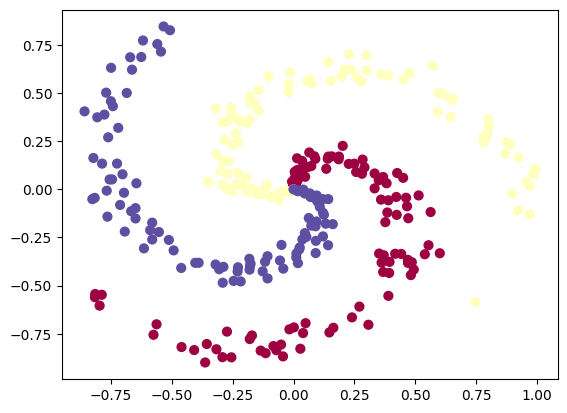

In [266]:
# Code for creating a spiral dataset from CS231n
import numpy as np
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [288]:
class SpiralModelV0(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=(hidden_units + 4)),
            nn.ReLU(),
            nn.Linear(in_features=(hidden_units + 4), out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features)
        )

    def forward(self, x):
        return self.linear_layer_stack(x)

In [289]:
NUM_CLASSES = 3
NUM_FEATURES = 2
RANDOM_SEED = 42

model_5 = SpiralModelV0(input_features=NUM_FEATURES, output_features=NUM_CLASSES, hidden_units=16).to(device)
print(model_5)

SpiralModelV0(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=20, bias=True)
    (5): ReLU()
    (6): Linear(in_features=20, out_features=16, bias=True)
    (7): ReLU()
    (8): Linear(in_features=16, out_features=3, bias=True)
  )
)


In [290]:
X_spiral = torch.from_numpy(X).type(torch.FloatTensor).to(device)
Y_spiral = torch.from_numpy(y).type(torch.LongTensor).to(device)

X_train_spiral, X_test_spiral, Y_train_spiral, Y_test_spiral = train_test_split(X_spiral, Y_spiral, test_size=0.2, random_state=RANDOM_SEED)




In [ ]:
loss_fnV1 = nn.CrossEntropyLoss()
optimizerV1 = optim.SGD(model_5.parameters(), lr=0.1)

In [292]:
def train_spiral_model(model, X_train, Y_train, X_test, Y_test, loss_fn, optimizer, epochs=1000):
    for epoch in range(epochs):
        model.train()
        # 1. Forward pass
        y_logits = model(X_train)
        y_pred = torch.argmax(y_logits, dim=1)

        # 2. Calculate loss and accuracy
        loss = loss_fn(y_logits, Y_train)
        acc = accuracy_fn(Y_true=Y_train,
                          Y_pred=y_pred)

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        ### Testing
        model.eval()
        with torch.inference_mode():
            # 1. Forward pass
            y_logits = model(X_test)
            y_pred = torch.argmax(y_logits, dim=1)

            # 2. Calculate loss and accuracy
            loss = loss_fn(y_logits, Y_test)
            acc = accuracy_fn(Y_true=Y_test,
                              Y_pred=y_pred)

            # 3. Print out the results
            if epoch % 100 == 0:
                print(f"Epoch: {epoch} | Train Loss: {loss.item():.5f} | Train Acc: {acc*100:.2f}%")

In [293]:
# train the model
train_spiral_model(model_5,
                   X_train_spiral,
                   Y_train_spiral,
                   X_test_spiral,
                   Y_test_spiral,
                   loss_fnV1,
                   optimizerV1,
                 epochs=100000)

Epoch: 0 | Train Loss: 1.10892 | Train Acc: 36.67%
Epoch: 100 | Train Loss: 1.10851 | Train Acc: 33.33%
Epoch: 200 | Train Loss: 1.10814 | Train Acc: 28.33%
Epoch: 300 | Train Loss: 1.10778 | Train Acc: 31.67%
Epoch: 400 | Train Loss: 1.10745 | Train Acc: 36.67%
Epoch: 500 | Train Loss: 1.10714 | Train Acc: 43.33%
Epoch: 600 | Train Loss: 1.10684 | Train Acc: 36.67%
Epoch: 700 | Train Loss: 1.10657 | Train Acc: 23.33%
Epoch: 800 | Train Loss: 1.10630 | Train Acc: 25.00%
Epoch: 900 | Train Loss: 1.10606 | Train Acc: 26.67%
Epoch: 1000 | Train Loss: 1.10582 | Train Acc: 26.67%
Epoch: 1100 | Train Loss: 1.10560 | Train Acc: 26.67%
Epoch: 1200 | Train Loss: 1.10540 | Train Acc: 26.67%
Epoch: 1300 | Train Loss: 1.10521 | Train Acc: 26.67%
Epoch: 1400 | Train Loss: 1.10503 | Train Acc: 26.67%
Epoch: 1500 | Train Loss: 1.10485 | Train Acc: 26.67%
Epoch: 1600 | Train Loss: 1.10469 | Train Acc: 26.67%
Epoch: 1700 | Train Loss: 1.10453 | Train Acc: 26.67%
Epoch: 1800 | Train Loss: 1.10437 | Trai

KeyboardInterrupt: 

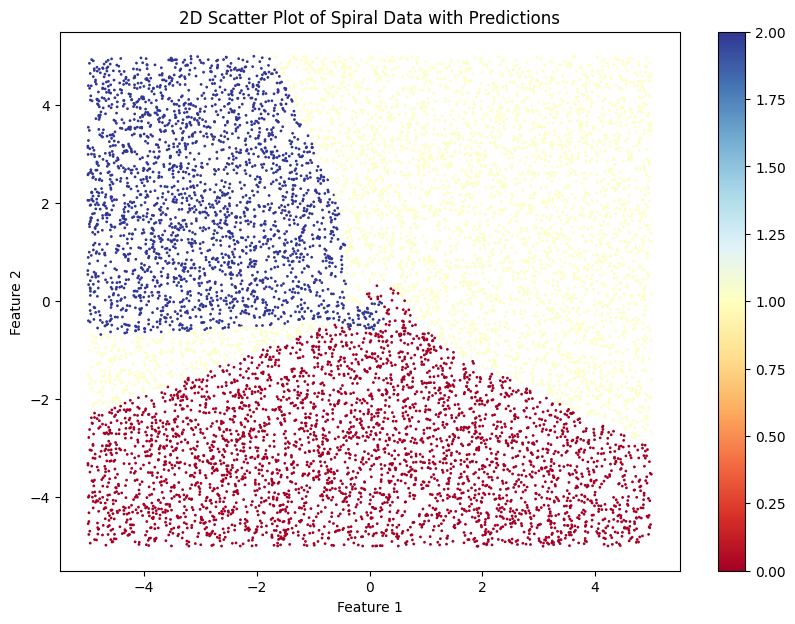

In [299]:
scatter2d_blob_data = torch.rand(10000, 2) * 10 - 5  # Random points in range [-5, 5]
with torch.inference_mode():
    pred_logits = model_5(scatter2d_blob_data.to(device))
    pred_data = torch.argmax(pred_logits, dim=1).cpu()
    
plt.figure(figsize=(10, 7))
plt.scatter(scatter2d_blob_data[:, 0], scatter2d_blob_data[:, 1], c=pred_data.cpu(), s=1, cmap=plt.cm.RdYlBu)
plt.colorbar()
plt.title("2D Scatter Plot of Spiral Data with Predictions")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

/tmp/ipykernel_58864/2732380846.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = plt.cm.get_cmap("viridis", NUM_CLASSES)


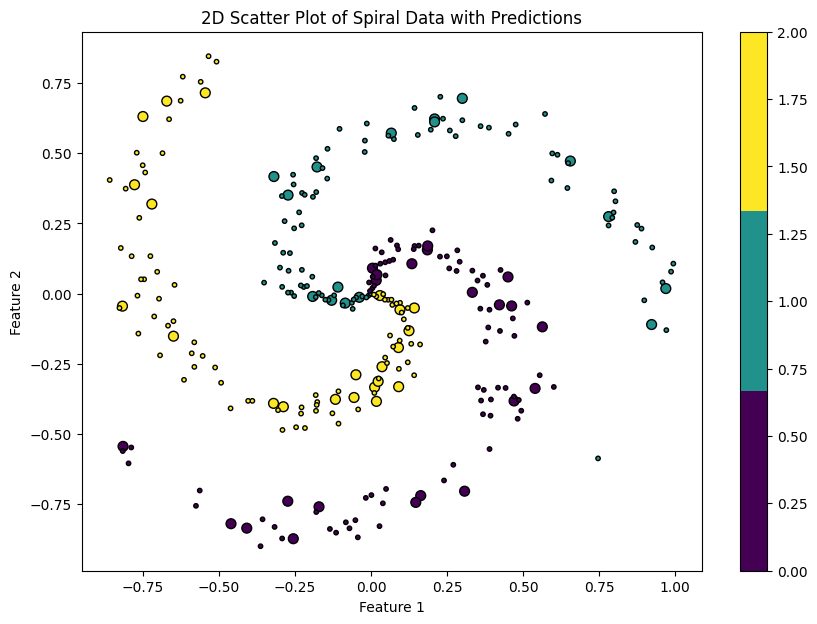

In [322]:
with torch.inference_mode():
    test_logits = model_5(X_test_spiral).squeeze()
    test_preds = torch.argmax(test_logits, dim=1)
    
color_map = plt.cm.get_cmap("viridis", NUM_CLASSES)

plt.figure(figsize=(10, 7))
plt.scatter(X_test_spiral[:, 0].cpu(), X_test_spiral[:, 1].cpu(), c=test_preds.cpu(), s=50, edgecolors='k', cmap=color_map)
plt.scatter(X_train_spiral[:, 0].cpu(), X_train_spiral[:, 1].cpu(), c=Y_train_spiral.cpu(), s=10, edgecolors='k', cmap=color_map, label='Train Data')
plt.colorbar()
plt.title("2D Scatter Plot of Spiral Data with Predictions")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()